In [1]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")
df=path
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


c:\Users\muSA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 43.3M/43.3M [00:31<00:00, 1.45MB/s]

Extracting files...


Path to dataset files: C:\Users\muSA\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [2]:
import os
import pandas as pd

# Get the path to the Excel file
excel_file_path = os.path.join(path, 'online_retail_II.xlsx')

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Display the head of the DataFrame
display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# ========================
# 📦 SETUP
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# ========================
# 📥 LOAD DATA
# ========================
# If you uploaded the CSV file to Colab:
# from google.colab import files
# uploaded = files.upload()

# Example: Load dataset (replace filename with your uploaded CSV)
# df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
#drop missing value

df.dropna(subset=['Customer ID'], inplace=True)

# remove nagtive quantitive
df = df[df['Quantity']>0]

# convert invoice data into date time

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# add total price column

df["TotalPrice"] = df['Quantity'] * df['Price']

#Prview

df.head()

df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,407695.000000,407695,407695.000000,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107,21.663261
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.842229,NaN,34.756655,1679.795700,77.147356


#Time-Based Analysis

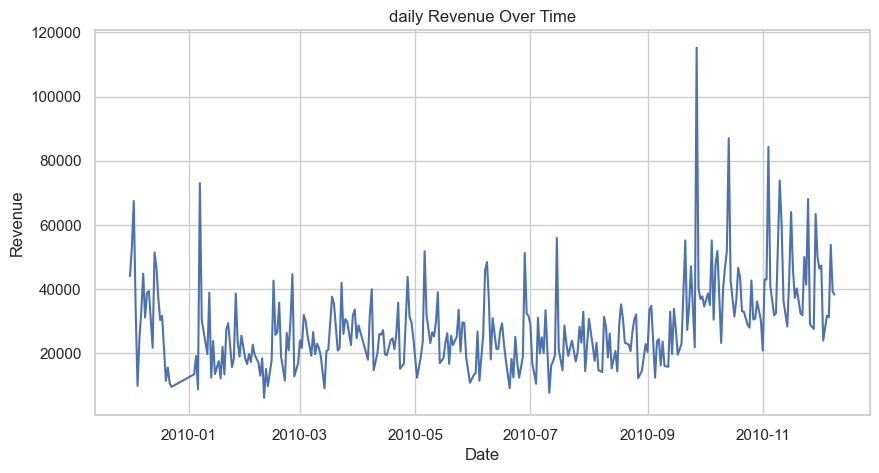

In [7]:
daily_rev= df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(10,5))
daily_rev.plot()
plt.title("daily Revenue Over Time")
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.show()

#Customer Segmentation (RFM)

In [8]:
import datetime as dt

# Reference date
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,
    "Invoice": "nunique",
    "TotalPrice": "sum"
}).rename(columns={
    "InvoiceDate": "Recency",
    "Invoice": "Frequency",
    "TotalPrice": "Monetary"
})

# Segment into quartiles
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score","F_Score","M_Score"]].sum(axis=1).astype(int)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,165,11,372.86,1,4,2,142,7
12347.0,3,2,1323.32,4,2,3,423,9
12348.0,74,1,222.16,2,1,1,211,4
12349.0,43,3,2671.14,3,3,4,334,10
12351.0,11,1,300.93,4,1,1,411,6


#Cohort Analysis

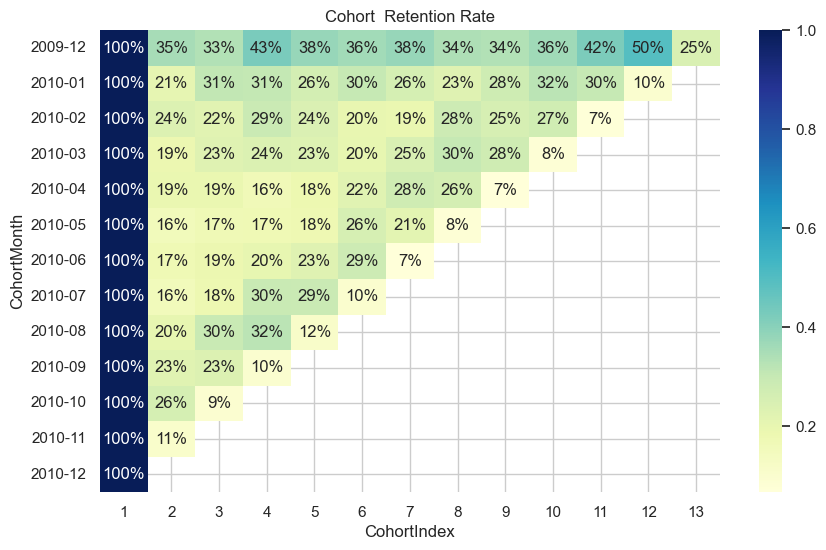

In [9]:
df["InvoiceMonth"]= df["InvoiceDate"].dt.to_period("M")
df["CohortMonth"]= df.groupby("Customer ID")["InvoiceMonth"].transform("min") # Changed to transform("min") to get the first purchase month

# Cohort index (months since first purchase)
def get_month_diff(d1,d2): # Added the missing colon
  return (d1.dt.year - d2.dt.year) * 12  + (d1.dt.month - d2.dt.month) + 1 # Corrected month difference calculation

df["CohortIndex"] = get_month_diff(df["InvoiceMonth"], df["CohortMonth"]) # Pass the Period objects directly

cohort_data= df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot= cohort_data.pivot(index= 'CohortMonth', columns='CohortIndex', values="Customer ID")


# persentage retention

cohort_size= cohort_pivot.iloc[:, 0]
retention= cohort_pivot.divide(cohort_size, axis=0) # Corrected the division for retention calculation

plt.figure(figsize=(10,6))

sns.heatmap(retention, annot=True, fmt= ".0%", cmap= "YlGnBu")
plt.title("Cohort  Retention Rate")
plt.show()

#Basket / Association Analysis (without ML)


In [10]:
import os
import pandas as pd
import kagglehub
from mlxtend.frequent_patterns import apriori, association_rules

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

# Get the path to the Excel file
excel_file_path = os.path.join(path, 'online_retail_II.xlsx')

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

#drop missing value
df.dropna(subset=['Customer ID'], inplace=True)

# remove nagtive quantitive
df = df[df['Quantity']>0]

# convert invoice data into date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# add total price column
df["TotalPrice"] = df['Quantity'] * df['Price']

# Prepare data for market basket analysis
basket = (df.groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().fillna(0))
basket = (basket > 0).astype(int)

# Frequent itemsets
freq_items = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(freq_items, metric="lift", min_threshold=1)

display(rules.sort_values("lift", ascending=False).head(10))

ModuleNotFoundError: No module named 'mlxtend'

#Trend & Seasonality Decomposition

In [ ]:
%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

# Use daily revenue
ts = daily_rev.asfreq("D").fillna(0)
result = seasonal_decompose(ts, model="additive")

result.plot()
plt.show()


In [ ]:
import os
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

# Get the path to the Excel file
excel_file_path = os.path.join(path, 'online_retail_II.xlsx')

# Read a subset of the Excel file into a pandas DataFrame to avoid memory issues
df = pd.read_excel(excel_file_path, nrows=100000) # Load only the first 100,000 rows

#drop missing value
df.dropna(subset=['Customer ID'], inplace=True)

# remove nagtive quantitive
df = df[df['Quantity']>0]

# convert invoice data into date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# add total price column
df["TotalPrice"] = df['Quantity'] * df['Price']

#Prview
display(df.head())
display(df.describe())

In [ ]:
daily_rev= df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()